In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
# %matplotlib inline
import seaborn as sns
from numpy.random import seed
seed(10)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
print(__doc__)

Automatically created module for IPython interactive environment


In [334]:
df= pd.read_csv("movie_metadata.csv")


In [335]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [336]:
df.imdb_score.value_counts()

6.7    223
6.6    201
7.2    195
6.5    186
6.4    185
7.3    184
7.0    184
7.1    181
6.8    181
6.1    179
6.3    176
6.2    175
6.9    174
7.4    147
5.9    144
7.5    140
6.0    131
7.6    124
5.8    124
5.7    117
7.7    114
5.6    112
7.8    106
5.4    104
5.5     98
5.3     92
8.0     75
7.9     75
5.1     71
8.1     69
      ... 
3.5     15
3.9     14
3.8     14
3.6     14
8.7     13
3.4     12
2.8      9
3.7      9
3.1      8
8.8      7
3.2      7
2.7      6
3.0      5
8.9      5
2.9      4
2.2      3
2.1      3
1.9      3
9.0      3
9.1      3
2.3      3
2.5      2
2.0      2
2.4      2
2.6      2
9.3      1
1.7      1
9.5      1
9.2      1
1.6      1
Name: imdb_score, Length: 78, dtype: int64

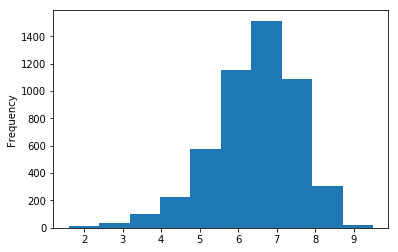

In [337]:
df.imdb_score.plot('hist')

In [338]:
numeric_features=df._get_numeric_data().columns.values.tolist()

In [339]:
print(numeric_features)

['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


In [340]:
df.shape

(5043, 28)

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [342]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [343]:
df.sort_values(['gross', 'duration'], ascending= False)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000
240,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,...,3597.0,English,USA,PG,115000000.0,1999.0,14000.0,6.5,2.35,13000
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,...,1470.0,English,USA,PG,11000000.0,1977.0,1000.0,8.7,2.35,33000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000


In [344]:
# making imdb_score numerical to categorical and renaming it with score
r = [4, 6, 8, 9,10]
g = [0,1,2,3]
df['score'] = pd.cut(df['imdb_score'], bins=r, labels=g)

In [345]:
df.shape

(5043, 29)

In [346]:
df= df.drop('imdb_score',axis= 1)

In [349]:
df.shape

(5043, 28)

In [350]:
print(df.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'aspect_ratio', 'movie_facebook_likes', 'score'],
      dtype='object')


In [351]:
print(df.dtypes)

color                          object
director_name                  object
num_critic_for_reviews        float64
duration                      float64
director_facebook_likes       float64
actor_3_facebook_likes        float64
actor_2_name                   object
actor_1_facebook_likes        float64
gross                         float64
genres                         object
actor_1_name                   object
movie_title                    object
num_voted_users                 int64
cast_total_facebook_likes       int64
actor_3_name                   object
facenumber_in_poster          float64
plot_keywords                  object
movie_imdb_link                object
num_user_for_reviews          float64
language                       object
country                        object
content_rating                 object
budget                        float64
title_year                    float64
actor_2_facebook_likes        float64
aspect_ratio                  float64
movie_facebo

In [352]:
y.dtypes

dtype('int64')

In [353]:
# decide which categorical require dummy
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))


Feature 'color' has 3 unique categories
Feature 'director_name' has 2399 unique categories
Feature 'actor_2_name' has 3033 unique categories
Feature 'genres' has 914 unique categories
Feature 'actor_1_name' has 2098 unique categories
Feature 'movie_title' has 4917 unique categories
Feature 'actor_3_name' has 3522 unique categories
Feature 'plot_keywords' has 4761 unique categories
Feature 'movie_imdb_link' has 4919 unique categories
Feature 'language' has 48 unique categories
Feature 'country' has 66 unique categories
Feature 'content_rating' has 19 unique categories


In [354]:
print(df['genres'].value_counts())

Drama                                              236
Comedy                                             209
Comedy|Drama                                       191
Comedy|Drama|Romance                               187
Comedy|Romance                                     158
Drama|Romance                                      152
Crime|Drama|Thriller                               101
Horror                                              71
Action|Crime|Drama|Thriller                         68
Action|Crime|Thriller                               65
Drama|Thriller                                      64
Crime|Drama                                         63
Horror|Thriller                                     56
Crime|Drama|Mystery|Thriller                        55
Action|Adventure|Sci-Fi                             51
Documentary                                         51
Comedy|Crime                                        51
Action|Adventure|Thriller                           46
Drama|Myst

In [355]:
print(df['content_rating'].value_counts().sort_values(ascending=False).head(10))
df['category'] = np.where(df['content_rating'] == 'R', 0,
                         np.where(df['content_rating'] == 'PG-13', 1,
                                 np.where(df['content_rating'] == 'PG', 2, 3)))
df = df.drop('content_rating',axis = 1)
df.shape

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
Name: content_rating, dtype: int64


(5043, 28)

In [356]:
print(df['category'].value_counts())

0    2118
1    1461
3     763
2     701
Name: category, dtype: int64


In [357]:

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,score,category
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,237000000.0,2009.0,936.0,1.78,33000,1,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,300000000.0,2007.0,5000.0,2.35,0,1,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,245000000.0,2015.0,393.0,2.35,85000,1,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,250000000.0,2012.0,23000.0,2.35,164000,2,1
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,NaN,0,1,3


In [358]:
print(df['country'].value_counts().sort_values(ascending=False).head(10))
df['country_category'] = np.where(df['country'] == 'USA', 0,
                         np.where(df['country'] == 'UK', 1,
                                 np.where((df['country'] == 'France') | (df['country'] == 'Canada'), 2, 3)))
df = df.drop('country', axis=1)
df.shape

USA          3807
UK            448
France        154
Canada        126
Germany        97
Australia      55
India          34
Spain          33
China          30
Japan          23
Name: country, dtype: int64


(5043, 28)

In [359]:
df['language'].value_counts()
df['language_category'] = np.where(df['language'] == 'English', 0,
                         np.where(df['language'] == 'French', 1,
                                 np.where(df['language'] == 'Spanish', 2, 3)))
df = df.drop('language', axis = 1)

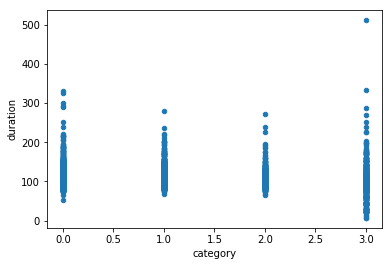

In [360]:
df.plot.scatter(x='category', y='duration')

In [361]:
# make the duration colums categorical applying bin for movie duration.
r = [0, 100, 200, 300,400]
g = [0,1,2,3]
df['duration_score'] = pd.cut(df['duration'], bins=r, labels=g)
df = df.drop('duration', axis = 1)

In [362]:
print(df['color'].value_counts())

Color               4815
 Black and White     209
Name: color, dtype: int64


In [363]:
# Create a list of features to dummy
todummy_list = ['duration_score', 'language_category', 'country_category', 'category']

# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [364]:
dummy_df(df, todummy_list)
df[['duration_score', 'language_category', 'country_category', 'category']]

,duration_score,language_category,country_category,category
0,1.0,0,0,1
1,1.0,0,0,1
2,1.0,0,1,1
3,1.0,0,0,1
4,NaN,3,3,3
5,1.0,0,0,1
6,1.0,0,0,1
7,0.0,0,0,2
8,1.0,0,0,1
9,1.0,0,1,2


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-null object
num_user_for_reviews         5022 non-n

In [366]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
budget                       492
title_year                   108
actor_2_facebook_likes        13
aspect_ratio                 329
movie_facebook_likes           0
score                        174
category                       0
country_category               0
language_category              0
duration_score                16
dtype: int64

In [367]:
df.fillna(method='ffill', axis='columns',limit=2)

,color,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,score,category,country_category,language_category,duration_score
0,Color,James Cameron,723,0,855,Joel David Moore,1000,7.60506e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,2.37e+08,2009,936,1.78,33000,1,1,0,0,1
1,Color,Gore Verbinski,302,563,1000,Orlando Bloom,40000,3.09404e+08,Action|Adventure|Fantasy,Johnny Depp,...,3e+08,2007,5000,2.35,0,1,1,0,0,1
2,Color,Sam Mendes,602,0,161,Rory Kinnear,11000,2.00074e+08,Action|Adventure|Thriller,Christoph Waltz,...,2.45e+08,2015,393,2.35,85000,1,1,1,0,1
3,Color,Christopher Nolan,813,22000,23000,Christian Bale,27000,4.48131e+08,Action|Thriller,Tom Hardy,...,2.5e+08,2012,23000,2.35,164000,2,1,0,0,1
4,NaN,Doug Walker,Doug Walker,131,131,Rob Walker,131,131,Documentary,Doug Walker,...,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,12,12,0,1,3,3,3,3
5,Color,Andrew Stanton,462,475,530,Samantha Morton,640,7.30587e+07,Action|Adventure|Sci-Fi,Daryl Sabara,...,2.637e+08,2012,632,2.35,24000,1,1,0,0,1
6,Color,Sam Raimi,392,0,4000,James Franco,24000,3.3653e+08,Action|Adventure|Romance,J.K. Simmons,...,2.58e+08,2007,11000,2.35,0,1,1,0,0,1
7,Color,Nathan Greno,324,15,284,Donna Murphy,799,2.00807e+08,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,...,2.6e+08,2010,553,1.85,29000,1,2,0,0,0
8,Color,Joss Whedon,635,0,19000,Robert Downey Jr.,26000,4.58992e+08,Action|Adventure|Sci-Fi,Chris Hemsworth,...,2.5e+08,2015,21000,2.35,118000,1,1,0,0,1
9,Color,David Yates,375,282,10000,Daniel Radcliffe,25000,3.01957e+08,Adventure|Family|Fantasy|Mystery,Alan Rickman,...,2.5e+08,2009,11000,2.35,10000,1,2,1,0,1


In [372]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews         0
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
budget                       492
title_year                   108
actor_2_facebook_likes        13
aspect_ratio                 329
movie_facebook_likes           0
score                        174
category                       0
country_category               0
language_category              0
duration_score                16
dtype: int64

In [ ]:
df.country.fillna(method='ffill',limit=5, inplace= True)

In [ ]:
df.content_rating.fillna(method='ffill',limit=5, inplace= True)

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
X.shape

In [ ]:
df.shape

In [ ]:
# decide which categorical require dummy
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))


In [ ]:
print(df['content_rating'].value_counts().sort_values(ascending=False).head(10))


In [ ]:
X = df[['duration_score', 'language_category', 'country_category', 'category']]

X['duration_score'] = X.duration_score.astype('int')
y= df['score'].astype('int')

#splited the data into 80:20 ratio of train and test for model fitting and validation.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)





In [374]:
print(X_train.shape)
print(y_train.shape)
print(y_train.dtypes)

(3884, 4)
(3884,)
int64


In [375]:
#Random_forest classifier

# Used GridSearchCV function for exhaustive search over specified parameter values for an estimator.
# GridSearch find all the combinations of parameter and give the best combination of the best parameter.

from sklearn.ensemble import RandomForestClassifier

scores = ['accuracy']
parameters = {'n_estimators': [50,70,100], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [ 5, 10,20], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,10]}
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    #print()

    Rand_Forest = GridSearchCV(RandomForestClassifier(), parameters,scoring='accuracy')
    Rand_Forest.fit(X_train,y_train)
    print("Best parameters set found on development set:")
    #print()
    print(Rand_Forest.best_params_)
    #print()
    print("Grid scores on development set:")
    #print()
    means = Rand_Forest.cv_results_['mean_test_score']
    stds =  Rand_Forest.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, Rand_Forest.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
               % (mean, std * 2, params))

    print("Detailed classification report:")
    #print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    #print()
    y_true, y_pred = y_test,Rand_Forest.predict(X_test)
    print(classification_report(y_true, y_pred))
    print("Detailed confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Accuracy Score: \n")
    print(accuracy_score(y_true, y_pred))
        
#    Accuracy Score obtained through Random Forest Classifier is : 67.76 %


# Tuning hyper-parameters for accuracy


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 70}
Grid scores on development set:
0.668 (+/-0.004) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.669 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
0.668 (+/-0.003) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.669 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
0.669 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 70}
0.669 (+/-0.002) for {'crit

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [308]:
#DecisionTreeClassifier
# scores = ['accuracy']
#param_grid = {'max_depth': np.arange(1, 11)}
param_grid = {'max_depth':[1,2,3,5,10,],'min_samples_split':[2,3,4,5,10],'max_leaf_nodes':[2,3,5,10,15],
               'min_samples_leaf': [2,5,10,15],'random_state':[11]}
print(param_grid)
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    #print()

    tree = GridSearchCV(DecisionTreeClassifier(), param_grid,scoring='accuracy')
    tree.fit(X_train,y_train)
    print("Best parameters set found on development set:")
    #print()
    print(tree.best_params_)
    #print()
    print("Grid scores on development set:")
    #print()
    means = tree.cv_results_['mean_test_score']
    stds =  tree.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, tree.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
               % (mean, std * 2, params))

    print("Detailed classification report:")
    #print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    #print()
    y_true, y_pred = y_test,tree.predict(X_test)
    print(classification_report(y_true, y_pred))
    print("Detailed confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Accuracy Score: \n")
    print(accuracy_score(y_true, y_pred))
    
 #    Accuracy Score by DecisionTree classifier is : 66.9% 
        
   

{'max_depth': [1, 2, 3, 5, 10], 'min_samples_split': [2, 3, 4, 5, 10], 'max_leaf_nodes': [2, 3, 5, 10, 15], 'min_samples_leaf': [2, 5, 10, 15], 'random_state': [11]}
# Tuning hyper-parameters for accuracy


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Best parameters set found on development set:
{'max_depth': 3, 'max_leaf_nodes': 15, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 11}
Grid scores on development set:
0.660 (+/-0.001) for {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 11}
0.660 (+/-0.001) for {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 3, 'random_state': 11}
0.660 (+/-0.001) for {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 4, 'random_state': 11}
0.660 (+/-0.001) for {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 11}
0.660 (+/-0.001) for {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 11}
0.660 (+/-0.001) for {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 11}
0.660 (+/-0.001) for {'max_depth': 1, 'max_leaf_nodes': 2, 

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [325]:


#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

tuned_parameters_GBC = [{'n_estimators': [1000], 'learning_rate': [1,2,5],
                     'max_features': [4], 'max_depth' : [3,4,5]}
                    ]
scores = ['accuracy']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    #print()

clf = GridSearchCV(GradientBoostingClassifier(), tuned_parameters_GBC, cv=5, scoring='%s' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
#print()
print(clf.best_params_)
#print()
print("Grid scores on development set:")
#print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Detailed classification report:")
#print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
#print()

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print("Detailed confusion matrix:")
print(confusion_matrix(y_true, y_pred))
print("Accuracy Score: \n")
print(accuracy_score(y_true, y_pred))


# Accuracy Score: 66.2%

# Tuning hyper-parameters for accuracy


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:
{'learning_rate': 1, 'max_depth': 4, 'max_features': 4, 'n_estimators': 1000}
Grid scores on development set:
0.662 (+/-0.017) for {'learning_rate': 1, 'max_depth': 3, 'max_features': 4, 'n_estimators': 1000}
0.663 (+/-0.019) for {'learning_rate': 1, 'max_depth': 4, 'max_features': 4, 'n_estimators': 1000}
0.662 (+/-0.017) for {'learning_rate': 1, 'max_depth': 5, 'max_features': 4, 'n_estimators': 1000}
0.340 (+/-0.336) for {'learning_rate': 2, 'max_depth': 3, 'max_features': 4, 'n_estimators': 1000}
0.338 (+/-0.364) for {'learning_rate': 2, 'max_depth': 4, 'max_features': 4, 'n_estimators': 1000}
0.361 (+/-0.309) for {'learning_rate': 2, 'max_depth': 5, 'max_features': 4, 'n_estimators': 1000}
0.299 (+/-0.113) for {'learning_rate': 5, 'max_depth': 3, 'max_features': 4, 'n_estimators': 1000}
0.264 (+/-0.200) for {'learning_rate': 5, 'max_depth': 4, 'max_features': 4, 'n_estimators': 1000}
0.334 (+/-0.234) for {'learning_rate': 5, 'max_depth

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [332]:

from sklearn.neural_network import MLPClassifier

scores = ['accuracy']
parameters={'learning_rate': ["constant", "invscaling", "adaptive"],'hidden_layer_sizes': [10,20,10,15],'alpha': [0.001,0.01,0.1,1],'activation': ["identity","logistic", "relu", "tanh"], 'random_state':[11]}
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    #print()

n_net = GridSearchCV(MLPClassifier(), parameters,scoring='accuracy')
n_net.fit(X_train,y_train)
print("Best parameters set found on development set:")
#print()
print(n_net.best_params_)
#print()
print("Grid scores on development set:")
#print()
means = n_net.cv_results_['mean_test_score']
stds = n_net.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, n_net.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Detailed classification report:")
#print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
#print()
y_true, y_pred = y_test, n_net.predict(X_test)
print(classification_report(y_true, y_pred))
print("Detailed confusion matrix:")
print(confusion_matrix(y_true, y_pred))
print("Accuracy Score: \n")
print(accuracy_score(y_true, y_pred))



# Accuracy Score: 66.7 %


# Tuning hyper-parameters for accuracy


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged

Best parameters set found on development set:
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 20, 'learning_rate': 'constant', 'random_state': 11}
Grid scores on development set:
0.660 (+/-0.001) for {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'random_state': 11}
0.660 (+/-0.001) for {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 10, 'learning_rate': 'invscaling', 'random_state': 11}
0.660 (+/-0.001) for {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 10, 'learning_rate': 'adaptive', 'random_state': 11}
0.660 (+/-0.001) for {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 20, 'learning_rate': 'constant', 'random_state': 11}
0.660 (+/-0.001) for {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 20, 'learning_rate': 'invscaling', 'random_state': 11}
0.660 (+/-0.001) for {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 20, 'learning_rate': 'ad

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
